In [10]:
!pip install xgboost

In [0]:
from google.colab import files

In [16]:
uploaded = files.upload()

Saving MAIN.csv to MAIN (3).csv


In [0]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

pd.options.display.max_columns = None

In [18]:
df = pd.read_csv('MAIN.csv')
df.head()

,Serial Number,BSC Indicator,Resigned,Is Re-Entry,Exp at Action,Age at Action,Is MPT,SUP Exp at Action,SUP Age at Action,SUP Is MPT,...,VAC_Sick,VAC_Vacation,Is EMP_SUP Same Gender,EMP Gender,Year After Grad,SUP Older Than EMP,Age Diff SUPvsEMP,Has SUP,Is SUP Male,Is SUP Female
0,1,0,0,0,43.778084,60.126026,1,17.59726,45.11507,1.0,...,0.0,0.0,1,0,45.863014,1,-15.010959,1,1,0
1,2,0,0,0,38.356163,56.205479,1,0.00000,0.00000,0.0,...,0.0,0.0,0,0,41.356163,0,0.000000,0,0,0
2,3,0,0,0,39.654793,60.041096,0,0.00000,0.00000,0.0,...,0.0,0.0,0,0,46.446575,0,0.000000,0,0,0
3,4,0,0,0,38.273972,58.202740,1,0.00000,0.00000,0.0,...,0.0,0.0,0,1,41.191780,0,0.000000,0,0,0
4,5,0,0,0,39.079453,61.120548,1,0.00000,0.00000,0.0,...,0.0,0.0,0,0,39.945206,0,0.000000,0,0,0


In [0]:
X = df.drop('Resigned',axis=1)
X = X.drop('Serial Number',axis=1)
y = df['Resigned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [0]:
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)

In [37]:
predictions = gbm.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [38]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.87      0.86      1139
          1       0.82      0.80      0.81       877

avg / total       0.84      0.84      0.84      2016



In [39]:
print(confusion_matrix(y_test,predictions))

[[990 149]
 [179 698]]


Text(0,0.5,'Frequency')

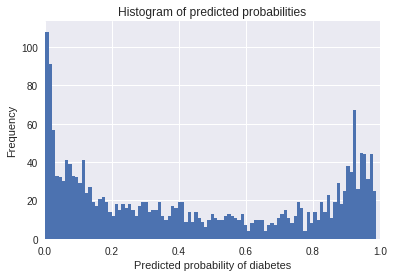

In [43]:
gbm_pred_prob = gbm.predict_proba(X_test)[:, 1]
plt.hist(gbm_pred_prob, bins=100)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

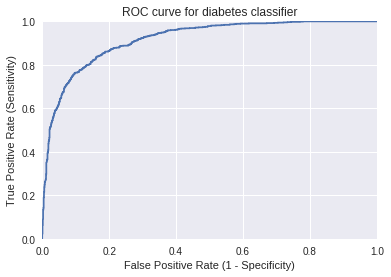

In [45]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, gbm_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [46]:
from sklearn.model_selection import cross_val_score
cross_val_score(gbm, X, y, cv=10, scoring='roc_auc').mean()

0.8391248944691021